In [2]:
#By Sirada Vitoonvarakorn (Grace) 6288156
#import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data Preparation

To begin with the dataset for machine learning, we first have to prepare and clean the data by removing any unnecessary values, drop/fill in blank values to make the dataset ready for machine learning. 

In [3]:
#Load dataset.csv
df = pd.read_csv('fire.csv')

In [4]:
# Dataframe dimensions
df.shape

(17442, 7)

In [5]:
# First 10 rows of data
df.head(10)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,gasoline,10.0,96.0,0.0,75.0,0
1,1.0,NaN,10.0,96.0,0.0,72.0,1
2,1.0,gasoline,10.0,96.0,NaN,NaN,1
3,NaN,gasoline,10.0,96.0,NaN,68.0,1
4,1.0,gasoline,10.0,109.0,4.5,67.0,1
5,1.0,gasoline,10.0,109.0,7.8,66.0,1
6,1.0,gasoline,10.0,103.0,9.7,NaN,1
7,1.0,NaN,10.0,95.0,12.0,NaN,1
8,1.0,gasoline,10.0,102.0,13.3,NaN,1
9,1.0,gasoline,10.0,93.0,15.4,52.0,1


In [6]:
#Need to drop size and fuel column for default setting 
df.drop(['SIZE','FUEL'], inplace=True, axis=1)

In [7]:
# Missing data by feature
df.isnull().sum()

DISTANCE     3471
DESIBEL      3424
AIRFLOW      3393
FREQUENCY    3566
STATUS          0
dtype: int64

In [8]:
#Make clean dataset by dropping each NaN columns one by one, use subset to prevent from lowering too many data. 
clean_df = df.dropna(subset=['DISTANCE', 'DESIBEL','AIRFLOW','FREQUENCY'])

In [9]:
clean_df

,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,10.0,96.0,0.0,75.0,0
1,10.0,96.0,0.0,72.0,1
4,10.0,109.0,4.5,67.0,1
5,10.0,109.0,7.8,66.0,1
9,10.0,93.0,15.4,52.0,1
...,...,...,...,...,...
17433,190.0,92.0,2.0,9.0,0
17434,190.0,91.0,1.9,8.0,0
17436,190.0,87.0,2.5,6.0,0
17437,190.0,86.0,2.2,5.0,0


In [10]:
clean_df.isnull().sum()

DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

## 2. Feature Selection
To find the best features to select for the machine learning from these four features, we do the comparison by...

C:\Users\AAA\AppData\Local\Temp/ipykernel_6208/3808552847.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True),


<AxesSubplot:>

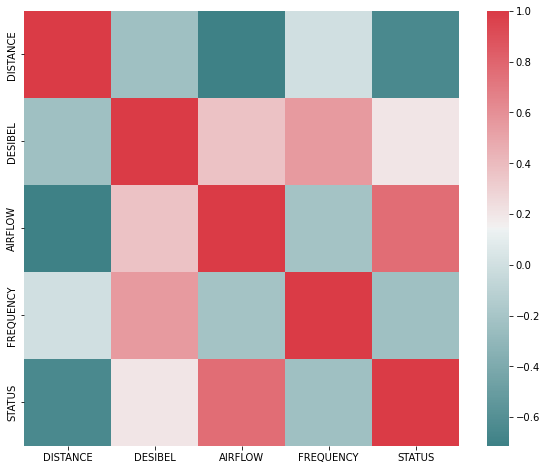

In [70]:
fi, axis = plt.subplots(figsize=(10, 8))
corr = clean_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axis)

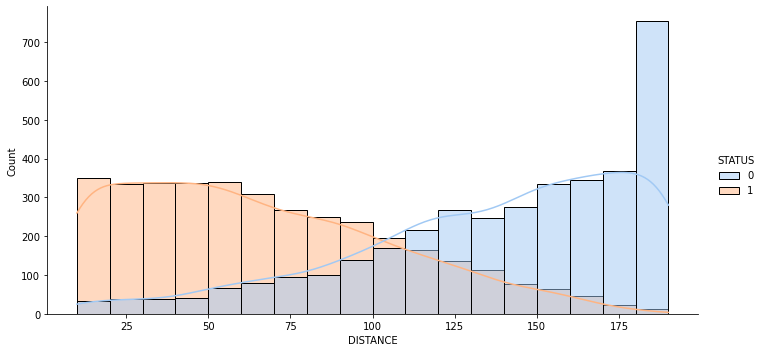

In [98]:
sns.displot(data=clean_df, x="DISTANCE", hue='STATUS', kde=True,palette='pastel', aspect=2)

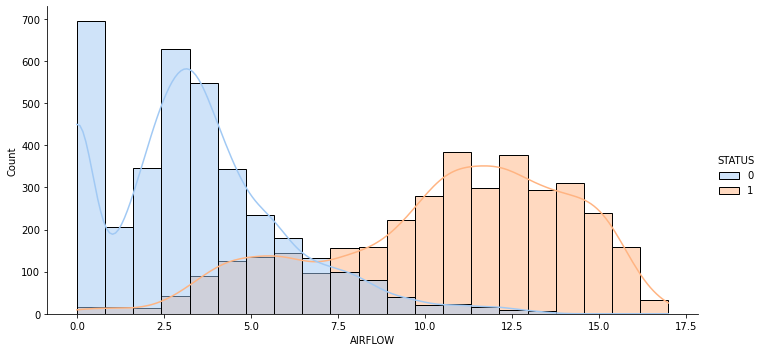

In [99]:
sns.displot(data=clean_df, x="AIRFLOW", hue='STATUS', kde=True,palette='pastel', aspect=2)

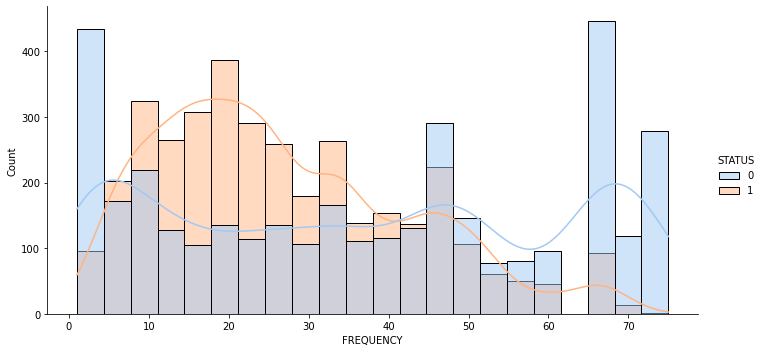

In [100]:
sns.displot(data=clean_df, x="FREQUENCY", hue='STATUS',palette='pastel',kde=True, aspect=2)

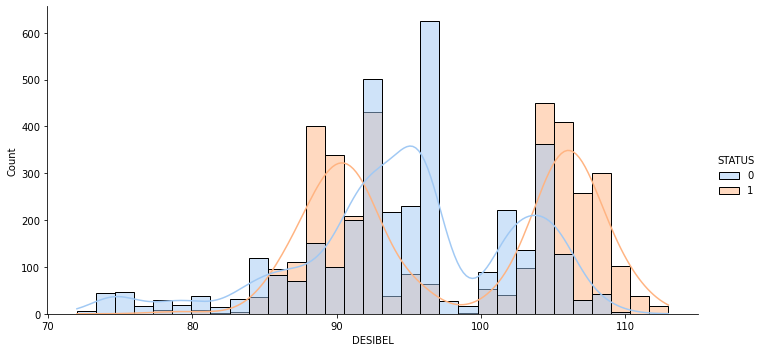

In [101]:
sns.displot(data=clean_df, x="DESIBEL", hue='STATUS', kde=True,palette='pastel', aspect=2)

In [102]:
#REF: RFE FEATURE SELECTION TRAIN FROM https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization/notebook

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(clean_df, clean_df.STATUS, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=3, step=1)
rfe = rfe.fit(x_train, y_train)

print('Best features:',x_train.columns[rfe.support_])

Best features: Index(['DISTANCE', 'AIRFLOW', 'STATUS'], dtype='object')


By observing from the following visual inspection. It has come to the conclusion that the distance, afterflow may be the best features to be used in machine learning as it has high connection with the status to how the fire can be extinguish succesfully or not. While the frequency and desibel features could be a bit random and unstable at times. 

The reason I also used RandomForestClassifier in order to do feature selection training because random forests are generally have good predictive performance as they calculate the importance of each variable in the section. Thus occasionally give a good result without having to overfit the values. 

## 3. Prepare training and testing datasets for Machine Learning


In [76]:
X = clean_df.drop(columns=['STATUS']).values
y = clean_df['STATUS'].values

In [77]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42,
    test_size=0.20)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test,
    random_state=42,
    test_size=0.50)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (5759, 4), (5759,)
Validation set: (720, 4), (720,)
Test set: (720, 4), (720,)


## 4. Model Selection

For selecting the best model option for machine learning. After consideration I decided to lower the option down to two, which is DecisionTreeClassifier and RandomTreeClassifier as both models are generally preferred for classification problems. And as we are focusing on predicting only one class it is better to compute while also considering the value of the important variable, hence the two selections are being used for the machine learning today. 

In [78]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

^From this point, we tried to first use the DecisionTreeClassifier because it is a basic approach in doing classification for machine learning. So it can predict the class from each of the split value in the dataset to be able to tell the desired value easily. 

In [79]:
# YOUR CODE HERE
y_hat_train = model.predict(X_train)
y_hat_valid = model.predict(X_valid)

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.3f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train):.3f}')
print('')
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.3f}')
print(f'Precision: {precision_score(y_true=y_valid, y_pred=y_hat_valid):.3f}')
print(f'Recall: {recall_score(y_true=y_valid, y_pred=y_hat_valid):.3f}')
print(f'F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid):.3f}')

Training Set
[[2675  213]
 [ 299 2572]]
Accuracy: 0.911
Precision: 0.924
Recall: 0.896
F1-score: 0.909

Validation Set
[[319  32]
 [ 48 321]]
Accuracy: 0.889
Precision: 0.909
Recall: 0.870
F1-score: 0.889


In [81]:
y_hat_test = model.predict(X_test)

In [82]:
print('\nTest Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.3f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test):.3f}')


Test Set
Accuracy: 0.882
F1-score: 0.874


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
s_X_train = scaler.transform(X_train)
model = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=4)
model = model.fit(s_X_train, y_train)

^I also tried doing Random Forest Classifier with the same reason done in Feature Selection. For good predictive results and lessen the overfitting, this time also introduce the StandardScaler in order to normalize the variables before applying to the machine model. I also messed with the parameters from n_estimators to max_depth as well as min_sample_leaf. The reason I decided to use these amounts is also because 100 is the default amount number of forests for balance. Max depth at 8 as I think is the balaneced amount for the dataset as more depth requires even more computational amount and strain on the model. The min_samples_leaf is also set to 4 as it can look at more observation before split, helping to less the risk to get overfitting values. 

In [95]:
y_hat_train = model.predict(s_X_train)
s_X_valid = scaler.transform(X_valid)
y_hat_valid = model.predict(s_X_valid)

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Training Set')
print(confusion_matrix(y_true=y_train, y_pred=y_hat_train))
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_hat_train):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_hat_train):.3f}')
print(f'F1-score: {f1_score(y_true=y_train, y_pred=y_hat_train):.3f}')
print('')
print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.3f}')
print(f'Precision: {precision_score(y_true=y_valid, y_pred=y_hat_valid):.3f}')
print(f'Recall: {recall_score(y_true=y_valid, y_pred=y_hat_valid):.3f}')
print(f'F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid):.3f}')

s_X_test = scaler.transform(X_test)
y_hat_test = model.predict(s_X_test)

print('\nTest Set')
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.3f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test):.3f}')

Training Set
[[2639  249]
 [ 278 2593]]
Accuracy: 0.908
Precision: 0.912
Recall: 0.903
F1-score: 0.908

Validation Set
[[316  35]
 [ 42 327]]
Accuracy: 0.893
Precision: 0.903
Recall: 0.886
F1-score: 0.895

Test Set
Accuracy: 0.903
F1-score: 0.899


## 5. Conclusion

In conclusion, from the prediction model results I think that it is possible to solve the prediction task with the given features left even if we are unable to use the fuel or the fire size features in order to get the class whether the fire is in extinction or non-extinction state. As per mentioned in the feature selection. The key features that would provide the decisive role in determining the results would be the distance and the airflow features as the more distance is, the lesser chance the fire will be extinguished. The more airflow is then the higher chance the fire will be extinguished as well. The best model to select for the Machine Learning however would have to be the RandomForestClassifier as it provides a more balanced results in the training and validation set, as well as better result in the test set later on when compared to the DecisionTreeClassifier.